# Convolutional Neural Networks and Multiclass Image Classification with Tensorflow
* These are used for object detection, image classification, image detection and segmentation
### In this we will cover: -
* Loading of data
* getting the labels of 176 classes of leaves we have
* Creating the directories of all the unique classes and distinguinshing the images based on the name provided in the xlsx and the name of the images as the primary key.
* creating the dictionary in key values format where key is the image name and value is the class name
* splitting the input data into training and validation
* reading the data and converting the images into tensors
* modifying the images into one size
* rescaling the images with ImageGenerator
* reading the image data and creating the batches. Thus, we create the batch size of 32 in which only 32 images will be read at a time. Class_mode will be **categorical** because in this dataset we have more than 2 classes. If we have only two classes in that case we will use the **binary** as an argument for class_mode parameter.
* **Creating** the Conv2D Model with the **ReLu** activation function in the hidden layers and the **filter** or the **kernel** that we are using is 3x3 matrix. This kernel helps in detecting the feature mapping of the images. While creating the model other layers that are required are **maxpooling** that helps in reducing the computation by reducing the intermediate results of the input data. The maxpooling will look for the key features and makes the model more generalized. Lastly, in this we have a layer of output with the **Softmax** function to get the probabilities of our result whether the image belongs to particular class or not. For example the model is able to detect correctly that the given image is of pizza.
* Second **compilation** of the model will occurs. In compilation we will observe the loss function which is **categorical_crossentropy** that helps to know the error between predicted value and the observed and if the loss function is large then the updation of weights will occur. Then we have the **Adam** otimizer that helps the algorithm to reach at the local minima of the loss on the basis of Gradient Descent Algorithm that we have discussed in the previous articles of Deep Learning Series. Lastly, in this we look for the **metrics** which is **accuracy** for evaluating the model.
* Last step is to fit the model on the training data and look for the accuracy on both training and validation data with the **epochs** value that we want to define.
* In this we observe that while creating the first model, the model overfits on the training data thus we do the data augmentation and some hyperparameter tuning to make the model more generalized. But still we will able to get the accuracy approx 50% or 51%.
* to increase the accuracy next we will look for transfer learning other than doing the hyperparametrization or hyper-parameter tuning

In [ ]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/classify-leaves.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/5500.jpg         
  inflating: images/5501.jpg         
  inflating: images/5502.jpg         
  inflating: images/5503.jpg         
  inflating: images/5504.jpg         
  inflating: images/5505.jpg         
  inflating: images/5506.jpg         
  inflating: images/5507.jpg         
  inflating: images/5508.jpg         
  inflating: images/5509.jpg         
  inflating: images/551.jpg          
  inflating: images/5510.jpg         
  inflating: images/5511.jpg         
  inflating: images/5512.jpg         
  inflating: images/5513.jpg         
  inflating: images/5514.jpg         
  inflating: images/5515.jpg         
  inflating: images/5516.jpg         
  inflating: images/5517.jpg         
  inflating: images/5518.jpg         
  inflating: images/5519.jpg         
  inflating: images/552.jpg          
  inflating: images/5520.jpg         
  inflating: images/5521.jpg         
  inflating: images/5522.jpg         

In [ ]:
train_data = pd.read_csv("train.csv")
train_data.head()

,image,label
0,images/0.jpg,maclura_pomifera
1,images/1.jpg,maclura_pomifera
2,images/2.jpg,maclura_pomifera
3,images/3.jpg,maclura_pomifera
4,images/4.jpg,maclura_pomifera


In [ ]:
class_lable = []
for lable in (train_data['label'].tolist()):
    if lable not in class_lable:
        class_lable.append(lable)
  
#train_data[["label"]].value_counts()

In [ ]:
len(class_lable)

176

In [ ]:
for i in range(0,len(class_lable)):
  path1 = (class_lable[i])
  
  path = os.path.join("/content/images/",path1)
  os.mkdir(path)

In [ ]:
len(pd.unique(train_data["label"]))

176

In [ ]:
for i in class_lable:
  print(i)

maclura_pomifera
ulmus_rubra
broussonettia_papyrifera
prunus_virginiana
acer_rubrum
cryptomeria_japonica
staphylea_trifolia
asimina_triloba
diospyros_virginiana
tilia_cordata
ulmus_pumila
quercus_muehlenbergii
juglans_cinerea
cercis_canadensis
ptelea_trifoliata
acer_palmatum
catalpa_speciosa
abies_concolor
eucommia_ulmoides
quercus_montana
koelreuteria_paniculata
liriodendron_tulipifera
styrax_japonica
malus_pumila
prunus_sargentii
cornus_mas
magnolia_virginiana
ostrya_virginiana
magnolia_acuminata
ilex_opaca
acer_negundo
fraxinus_nigra
pyrus_calleryana
picea_abies
chionanthus_virginicus
carpinus_caroliniana
zelkova_serrata
aesculus_pavi
taxodium_distichum
carya_tomentosa
picea_pungens
carya_glabra
quercus_macrocarpa
carya_cordiformis
catalpa_bignonioides
tsuga_canadensis
populus_tremuloides
magnolia_denudata
crataegus_viridis
populus_deltoides
ulmus_americana
pinus_bungeana
cornus_florida
pinus_densiflora
morus_alba
quercus_velutina
pinus_parviflora
salix_caroliniana
platanus_occident

In [ ]:
! ls images

0.jpg	   13492.jpg  16984.jpg  20474.jpg  23966.jpg  3018.jpg  650.jpg
10000.jpg  13493.jpg  16985.jpg  20475.jpg  23967.jpg  3019.jpg  6510.jpg
10001.jpg  13494.jpg  16986.jpg  20476.jpg  23968.jpg  301.jpg	 6511.jpg
10002.jpg  13495.jpg  16987.jpg  20477.jpg  23969.jpg  3020.jpg  6512.jpg
10003.jpg  13496.jpg  16988.jpg  20478.jpg  2396.jpg   3021.jpg  6513.jpg
10004.jpg  13497.jpg  16989.jpg  20479.jpg  23970.jpg  3022.jpg  6514.jpg
10005.jpg  13498.jpg  1698.jpg	 2047.jpg   23971.jpg  3023.jpg  6515.jpg
10006.jpg  13499.jpg  16990.jpg  20480.jpg  23972.jpg  3024.jpg  6516.jpg
10007.jpg  1349.jpg   16991.jpg  20481.jpg  23973.jpg  3025.jpg  6517.jpg
10008.jpg  134.jpg    16992.jpg  20482.jpg  23974.jpg  3026.jpg  6518.jpg
10009.jpg  13500.jpg  16993.jpg  20483.jpg  23975.jpg  3027.jpg  6519.jpg
1000.jpg   13501.jpg  16994.jpg  20484.jpg  23976.jpg  3028.jpg  651.jpg
10010.jpg  13502.jpg  16995.jpg  20485.jpg  23977.jpg  3029.jpg  6520.jpg
10011.jpg  13503.jpg  16996.jpg  20486.jpg  

In [ ]:
train_data['image'].head()

0    images/0.jpg
1    images/1.jpg
2    images/2.jpg
3    images/3.jpg
4    images/4.jpg
Name: image, dtype: object

In [ ]:
train_data["image"] = train_data[["image"]].replace(regex = "images/",value = "")
train_data.head()
#train_data["image"].iloc[0]


,image,label
0,0.jpg,maclura_pomifera
1,1.jpg,maclura_pomifera
2,2.jpg,maclura_pomifera
3,3.jpg,maclura_pomifera
4,4.jpg,maclura_pomifera


In [ ]:

train_data["image"] = train_data["image"].apply(lambda x:os.path.join("/content/images/",x) )
train_data.head()

,image,label
0,/content/images/0.jpg,maclura_pomifera
1,/content/images/1.jpg,maclura_pomifera
2,/content/images/2.jpg,maclura_pomifera
3,/content/images/3.jpg,maclura_pomifera
4,/content/images/4.jpg,maclura_pomifera


In [ ]:
from os import listdir
from os.path import isfile, join
mypath = '/content/images/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['9021.jpg', '14588.jpg', '22322.jpg', '16193.jpg', '20644.jpg', '1988.jpg', '22827.jpg', '24626.jpg', '17739.jpg', '5318.jpg', '5379.jpg', '9679.jpg', '12381.jpg', '15443.jpg', '1623.jpg', '3796.jpg', '23053.jpg', '7128.jpg', '24724.jpg', '4163.jpg', '8591.jpg', '717.jpg', '12592.jpg', '7196.jpg', '14111.jpg', '5928.jpg', '17433.jpg', '22780.jpg', '7963.jpg', '2138.jpg', '9493.jpg', '23453.jpg', '17578.jpg', '23728.jpg', '24568.jpg', '8902.jpg', '10528.jpg', '13635.jpg', '7803.jpg', '2455.jpg', '16510.jpg', '19312.jpg', '508.jpg', '1784.jpg', '5667.jpg', '120.jpg', '5581.jpg', '1897.jpg', '1828.jpg', '6170.jpg', '26707.jpg', '23766.jpg', '27115.jpg', '2876.jpg', '26019.jpg', '23369.jpg', '22651.jpg', '19759.jpg', '21196.jpg', '26294.jpg', '19514.jpg', '5560.jpg', '14211.jpg', '15406.jpg', '26861.jpg', '17000.jpg', '26032.jpg', '1822.jpg', '23490.jpg', '2625.jpg', '22809.jpg', '16527.jpg', '5983.jpg', '17085.jpg', '2457.jpg', '23544.jpg', '15512.jpg', '5807.jpg', '7535.jpg', '17511.jpg

In [ ]:
dict_label = dict(zip(train_data['image'],train_data['label']))

In [ ]:
dict_label.keys()

dict_keys(['/content/images/0.jpg', '/content/images/1.jpg', '/content/images/2.jpg', '/content/images/3.jpg', '/content/images/4.jpg', '/content/images/5.jpg', '/content/images/6.jpg', '/content/images/7.jpg', '/content/images/8.jpg', '/content/images/9.jpg', '/content/images/10.jpg', '/content/images/11.jpg', '/content/images/12.jpg', '/content/images/13.jpg', '/content/images/14.jpg', '/content/images/15.jpg', '/content/images/16.jpg', '/content/images/17.jpg', '/content/images/18.jpg', '/content/images/19.jpg', '/content/images/20.jpg', '/content/images/21.jpg', '/content/images/22.jpg', '/content/images/23.jpg', '/content/images/24.jpg', '/content/images/25.jpg', '/content/images/26.jpg', '/content/images/27.jpg', '/content/images/28.jpg', '/content/images/29.jpg', '/content/images/30.jpg', '/content/images/31.jpg', '/content/images/32.jpg', '/content/images/33.jpg', '/content/images/34.jpg', '/content/images/35.jpg', '/content/images/36.jpg', '/content/images/37.jpg', '/content/i

In [ ]:
import shutil 
directory = "/content/images"
#sub_dir = "/"
#new_path = "/content/train_leaves_data"
list_subfolders_with_paths = [os.path.basename(f2) for f2 in os.scandir(directory) if f2.is_dir()]


for filename2 in (os.listdir(directory)):
    f2 = os.path.join(directory,filename2)
    for i in dict_label:
      #print(i, dict_label[i])
      if (i == (f2)):
        z = os.path.split(f2)
        z = z[1]
        print(z)
        #label = (dict_label[i])
        for j in class_lable:
          if(j == dict_label[i]):
            #i = os.path.split(i)
            #i = i[1]
            new_path = directory + "/" +j+"/"+z
            print(new_path)
            shutil.copy2(f2,new_path)


        #for j in range(0,len(class_lable)):
          #print(j)
      #if(label == (j for j in list_subfolders_with_paths)):
        #print(label)
           # new_path = directory+"/"+label+"/"+i
            #shutil.copy2(f2,new_path)

            
#shutil.copy2(curt_dicts,new_path)


Streaming output truncated to the last 5000 lines.
715.jpg
/content/images/picea_pungens/715.jpg
12900.jpg
/content/images/quercus_robur/12900.jpg
17030.jpg
/content/images/magnolia_stellata/17030.jpg
11819.jpg
/content/images/prunus_serotina/11819.jpg
9432.jpg
/content/images/pinus_flexilis/9432.jpg
2527.jpg
/content/images/ulmus_parvifolia/2527.jpg
2854.jpg
/content/images/quercus_marilandica/2854.jpg
5431.jpg
/content/images/quercus_virginiana/5431.jpg
16028.jpg
/content/images/sassafras_albidum/16028.jpg
10085.jpg
/content/images/acer_rubrum/10085.jpg
7588.jpg
/content/images/liriodendron_tulipifera/7588.jpg
12511.jpg
/content/images/pinus_thunbergii/12511.jpg
7521.jpg
/content/images/robinia_pseudo-acacia/7521.jpg
9123.jpg
/content/images/chamaecyparis_pisifera/9123.jpg
3846.jpg
/content/images/koelreuteria_paniculata/3846.jpg
16886.jpg
/content/images/fraxinus_nigra/16886.jpg
4566.jpg
/content/images/salix_matsudana/4566.jpg
5127.jpg
/content/images/carpinus_betulus/5127.jpg
1517

In [ ]:
! pip install split-folders

In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio('/content/images', output="output", seed=1337, ratio=(.8, 0.2))


Copying files: 18353 files [00:05, 3457.64 files/s]


In [ ]:
for dirpath, dirnames, filenames in os.walk("output"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'output'.
There are 176 directories and 0 images in 'output/train'.
There are 0 directories and 282 images in 'output/train/maclura_pomifera'.
There are 0 directories and 79 images in 'output/train/crataegus_viridis'.
There are 0 directories and 82 images in 'output/train/pinus_resinosa'.
There are 0 directories and 98 images in 'output/train/catalpa_speciosa'.
There are 0 directories and 76 images in 'output/train/populus_grandidentata'.
There are 0 directories and 115 images in 'output/train/cercis_canadensis'.
There are 0 directories and 71 images in 'output/train/malus_baccata'.
There are 0 directories and 92 images in 'output/train/acer_saccharum'.
There are 0 directories and 151 images in 'output/train/ulmus_pumila'.
There are 0 directories and 96 images in 'output/train/tsuga_canadensis'.
There are 0 directories and 64 images in 'output/train/albizia_julibrissin'.
There are 0 directories and 84 images in 'output/train/pyrus_calleryana'.
Th

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (224, 224, 3)


array([[[210, 228, 214],
        [211, 227, 214],
        [211, 227, 214],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]],

       [[210, 228, 214],
        [211, 227, 214],
        [211, 227, 214],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]],

       [[210, 228, 214],
        [211, 227, 214],
        [211, 227, 214],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]],

       ...,

       [[205, 218, 208],
        [205, 218, 208],
        [205, 218, 208],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]],

       [[205, 218, 208],
        [206, 219, 209],
        [205, 218, 208],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]],

       [[203, 216, 206],
        [204, 217, 207],
        [203, 216, 206],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

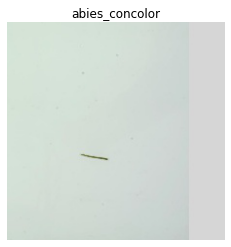

In [ ]:
#/content/output/train/abies_concolor
view_random_image(target_dir = "/content/output/train/",target_class="abies_concolor")

# Preprocess the data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_gen = ImageDataGenerator(rescale = 1/255.)
valid_data_gen = ImageDataGenerator(rescale=1/255.)

# set the paths
# set the paths to our data directory
train_dir = "/content/output/train"
valid_dir = "/content/output/val"


# load data from directories and turn into batches
train_data_processed = train_data_gen.flow_from_directory(train_dir,
                                                          target_size = (224,224),
                                                          batch_size = 32,
                                                          class_mode = 'categorical')
valid_data = valid_data_gen.flow_from_directory(valid_dir,
                                                target_size =(224,224),
                                                batch_size =32,
                                                class_mode ='categorical')


Found 14613 images belonging to 176 classes.
Found 3740 images belonging to 176 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation

In [ ]:
model_1 = Sequential([
                      Conv2D(filters = 10,kernel_size = 3,input_shape=(224,224,3)),
                      Activation(activation="relu"),
                      Conv2D(10,3,activation ='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(176, activation="softmax")

])

model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data_processed,
                        epochs = 5,
                        steps_per_epoch = len(train_data_processed),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
457/457 [==============================] - 57s 103ms/step - loss: 4.1341 - accuracy: 0.1438 - val_loss: 3.3508 - val_accuracy: 0.2460
Epoch 2/5
457/457 [==============================] - 45s 99ms/step - loss: 2.1428 - accuracy: 0.4687 - val_loss: 3.0756 - val_accuracy: 0.3291
Epoch 3/5
457/457 [==============================] - 45s 98ms/step - loss: 0.8521 - accuracy: 0.7701 - val_loss: 3.8911 - val_accuracy: 0.3396
Epoch 4/5
457/457 [==============================] - 45s 97ms/step - loss: 0.3321 - accuracy: 0.9130 - val_loss: 4.7000 - val_accuracy: 0.3481
Epoch 5/5
457/457 [==============================] - 46s 100ms/step - loss: 0.1503 - accuracy: 0.9644 - val_loss: 5.6259 - val_accuracy: 0.3588


# Evaluate the model

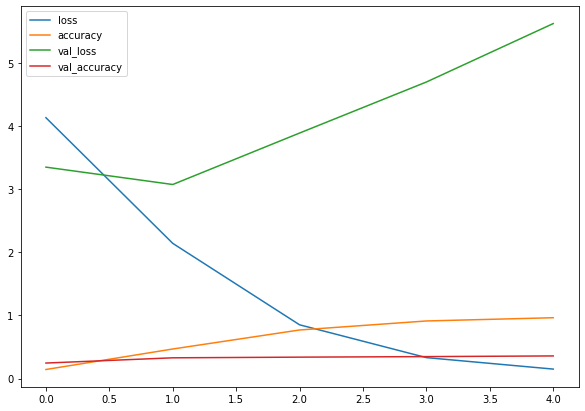

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

# Data Augmentation with simplifying the model and increasing the learning EPOCHs

# Create augmented data

In [ ]:
train_data_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip=True
                                          )

In [ ]:
train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical",
                                            )

Found 14613 images belonging to 176 classes.


In [ ]:
model_2 = Sequential([
                      Conv2D(filters = 15,kernel_size = 3,input_shape=(224,224,3)),
                      Activation(activation="relu"),
                      #Conv2D(15,3,activation ='relu'),
                      MaxPool2D(),
                      #Conv2D(15,3,activation="relu"),
                      Conv2D(15,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(176, activation="softmax")

])

model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
history_2 = model_2.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))

Epoch 1/10
457/457 [==============================] - 186s 406ms/step - loss: 5.0100 - accuracy: 0.0248 - val_loss: 4.7478 - val_accuracy: 0.0586
Epoch 2/10
457/457 [==============================] - 183s 401ms/step - loss: 4.7400 - accuracy: 0.0517 - val_loss: 4.4106 - val_accuracy: 0.0848
Epoch 3/10
457/457 [==============================] - 180s 394ms/step - loss: 4.5372 - accuracy: 0.0690 - val_loss: 4.2781 - val_accuracy: 0.1051
Epoch 4/10
457/457 [==============================] - 183s 400ms/step - loss: 4.4345 - accuracy: 0.0846 - val_loss: 4.1710 - val_accuracy: 0.1053
Epoch 5/10
457/457 [==============================] - 182s 398ms/step - loss: 4.2545 - accuracy: 0.0998 - val_loss: 3.8802 - val_accuracy: 0.1393
Epoch 6/10
457/457 [==============================] - 179s 393ms/step - loss: 4.1459 - accuracy: 0.1074 - val_loss: 3.7608 - val_accuracy: 0.1610
Epoch 7/10
457/457 [==============================] - 182s 398ms/step - loss: 4.3284 - accuracy: 0.0893 - val_loss: 4.1983 -

In [ ]:
history_3 = model_2.fit(train_data_augmented,
                        epochs=30,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))

Epoch 1/30
457/457 [==============================] - 186s 407ms/step - loss: 3.7125 - accuracy: 0.1634 - val_loss: 3.3981 - val_accuracy: 0.2107
Epoch 2/30
457/457 [==============================] - 185s 406ms/step - loss: 3.6375 - accuracy: 0.1753 - val_loss: 3.2989 - val_accuracy: 0.2219
Epoch 3/30
457/457 [==============================] - 188s 412ms/step - loss: 3.6904 - accuracy: 0.1627 - val_loss: 3.3756 - val_accuracy: 0.1968
Epoch 4/30
457/457 [==============================] - 185s 405ms/step - loss: 3.5055 - accuracy: 0.1967 - val_loss: 3.2328 - val_accuracy: 0.2283
Epoch 5/30
457/457 [==============================] - 186s 406ms/step - loss: 3.4836 - accuracy: 0.1920 - val_loss: 3.2686 - val_accuracy: 0.2203
Epoch 6/30
457/457 [==============================] - 186s 406ms/step - loss: 3.4129 - accuracy: 0.2020 - val_loss: 3.1307 - val_accuracy: 0.2404
Epoch 7/30
457/457 [==============================] - 186s 408ms/step - loss: 3.3334 - accuracy: 0.2141 - val_loss: 3.1340 -

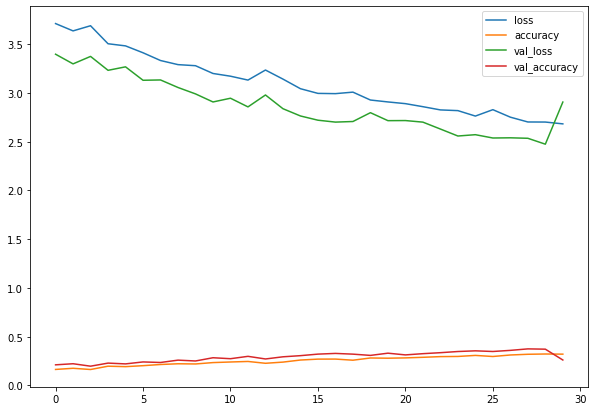

In [ ]:
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [ ]:
model_3 = Sequential([
                      Conv2D(filters = 15,kernel_size = 3,input_shape=(224,224,3)),
                      Activation(activation="relu"),
                      #Conv2D(15,3,activation ='relu'),
                      MaxPool2D(),
                      #Conv2D(15,3,activation="relu"),
                      Conv2D(15,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(15,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(176, activation="softmax")

])

model_3.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
history_4 = model_3.fit(train_data_augmented,
                        epochs=50,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))

Epoch 1/50
457/457 [==============================] - 179s 391ms/step - loss: 4.9220 - accuracy: 0.0260 - val_loss: 4.5429 - val_accuracy: 0.0618
Epoch 2/50
457/457 [==============================] - 179s 391ms/step - loss: 4.5439 - accuracy: 0.0634 - val_loss: 4.2094 - val_accuracy: 0.1067
Epoch 3/50
457/457 [==============================] - 183s 400ms/step - loss: 4.1865 - accuracy: 0.0978 - val_loss: 3.7437 - val_accuracy: 0.1388
Epoch 4/50
457/457 [==============================] - 179s 393ms/step - loss: 3.8810 - accuracy: 0.1177 - val_loss: 3.4873 - val_accuracy: 0.1754
Epoch 5/50
457/457 [==============================] - 179s 393ms/step - loss: 3.6320 - accuracy: 0.1476 - val_loss: 3.3279 - val_accuracy: 0.1933
Epoch 6/50
457/457 [==============================] - 179s 391ms/step - loss: 3.4311 - accuracy: 0.1759 - val_loss: 3.1029 - val_accuracy: 0.2409
Epoch 7/50
457/457 [==============================] - 182s 398ms/step - loss: 3.3380 - accuracy: 0.1896 - val_loss: 3.1288 -

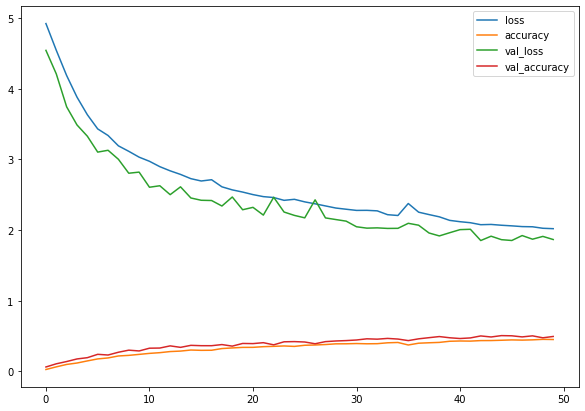

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))

Use the trained models to make some predictions on our own custom images

In [ ]:
class_lable

['maclura_pomifera',
 'ulmus_rubra',
 'broussonettia_papyrifera',
 'prunus_virginiana',
 'acer_rubrum',
 'cryptomeria_japonica',
 'staphylea_trifolia',
 'asimina_triloba',
 'diospyros_virginiana',
 'tilia_cordata',
 'ulmus_pumila',
 'quercus_muehlenbergii',
 'juglans_cinerea',
 'cercis_canadensis',
 'ptelea_trifoliata',
 'acer_palmatum',
 'catalpa_speciosa',
 'abies_concolor',
 'eucommia_ulmoides',
 'quercus_montana',
 'koelreuteria_paniculata',
 'liriodendron_tulipifera',
 'styrax_japonica',
 'malus_pumila',
 'prunus_sargentii',
 'cornus_mas',
 'magnolia_virginiana',
 'ostrya_virginiana',
 'magnolia_acuminata',
 'ilex_opaca',
 'acer_negundo',
 'fraxinus_nigra',
 'pyrus_calleryana',
 'picea_abies',
 'chionanthus_virginicus',
 'carpinus_caroliniana',
 'zelkova_serrata',
 'aesculus_pavi',
 'taxodium_distichum',
 'carya_tomentosa',
 'picea_pungens',
 'carya_glabra',
 'quercus_macrocarpa',
 'carya_cordiformis',
 'catalpa_bignonioides',
 'tsuga_canadensis',
 'populus_tremuloides',
 'magnoli

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_lable):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

    if len(pred[0])>1:
        pred_class = class_lable[tf.argmax(pred[0])]
  
    else:
        pred_class = class_lable[int(tf.round(pred[0])[0][0])]

  # Get the predicted class
  

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

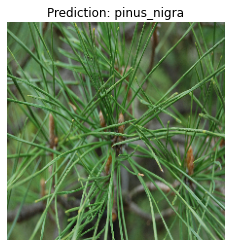

In [ ]:
pred_and_plot(model_3,filename='pinus-thunbergii-leaf.jpg',class_lable = class_lable)

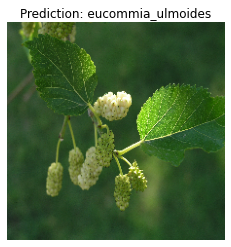

In [ ]:
pred_and_plot(model_3,filename='Morus-alba.jpg',class_lable = class_lable)

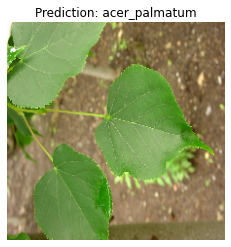

In [ ]:
#tilia-cordata

pred_and_plot(model_3,filename='tilia-cordata.jpg',class_lable = class_lable)
